In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
auxX = np.load('data5/X.npy')
auxY = np.load('data5/y.npy')

X = auxX[0:1000,:]
y = auxY[0:1000]

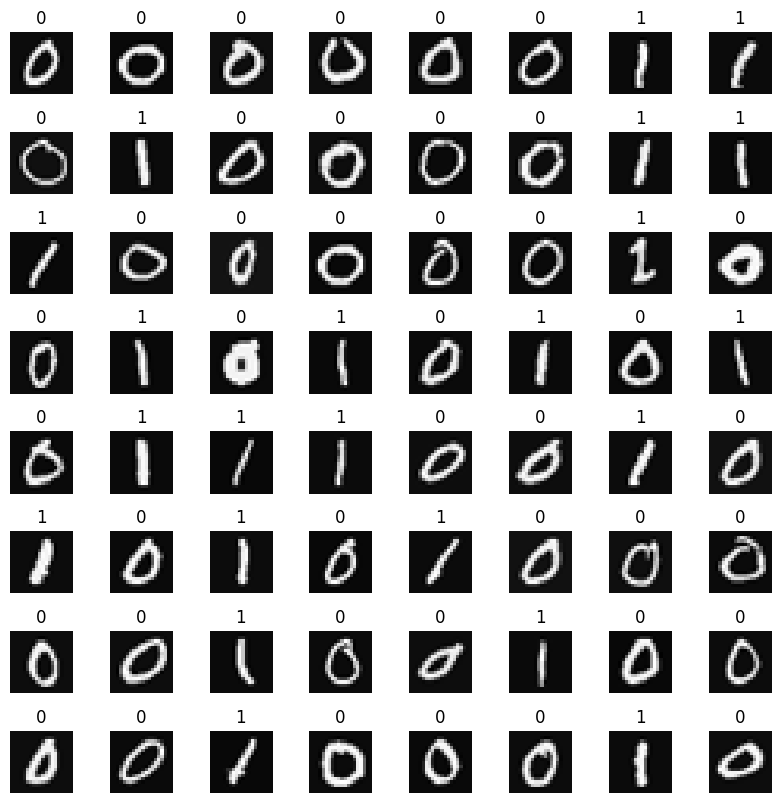

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
       
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [51]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [65]:
model = Sequential([Dense(units = 25, activation = 'sigmoid'), Dense(units = 15, activation = 'sigmoid'), Dense(units = 1, activation = 'sigmoid')])
model.compile(loss =BinaryCrossentropy())

model.fit(X, y, epochs = 20)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5808
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4081
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2777
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1308
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0933
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 13/100
32/32 [=================

In [66]:
# evalua el modelo
predictions = model.predict(X)

#imprime la precision
print("Precision: ", np.sum(np.where(predictions >= 0.5, 1, 0) == y)/ len(y))
print("Erroneos: ", np.sum(np.where(predictions >= 0.5, 1, 0) != y))
predictions

32/32 [==============================] - 0s 1ms/step
Precision:  1.0
Erroneos:  0


array([[5.4653537e-08],
       [5.4707876e-08],
       [5.4630398e-08],
       [5.4609668e-08],
       [5.4662607e-08],
       [5.4644676e-08],
       [5.4606438e-08],
       [5.5353283e-08],
       [5.4616542e-08],
       [5.4653121e-08],
       [5.4641340e-08],
       [5.4753389e-08],
       [5.4623314e-08],
       [5.4823509e-08],
       [5.4605188e-08],
       [5.4822149e-08],
       [5.4610084e-08],
       [5.4628419e-08],
       [5.4637901e-08],
       [5.4622483e-08],
       [5.4612272e-08],
       [5.4702969e-08],
       [5.4637901e-08],
       [5.6556349e-08],
       [5.4827272e-08],
       [5.4640402e-08],
       [5.4951965e-08],
       [5.6128858e-08],
       [6.8440102e-08],
       [5.4654684e-08],
       [5.4783996e-08],
       [5.4609146e-08],
       [5.4610815e-08],
       [5.4628732e-08],
       [5.4604460e-08],
       [5.4658855e-08],
       [5.4649160e-08],
       [5.4612688e-08],
       [5.4604460e-08],
       [5.4603731e-08],
       [5.4609565e-08],
       [5.461060